In [1]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

In [2]:
print(torch.cuda.is_available())

True


In [3]:
model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/mnt/petrelfs/wangyihao/miniconda3/envs/diffusion/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [11]:
prompt = "a photo of an astronaut riding a horse on mars"
images = pipe(prompt).images

  0%|          | 0/50 [00:00<?, ?it/s]

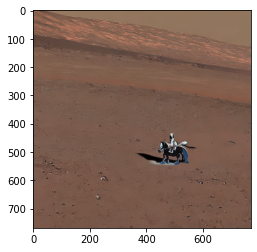

In [12]:
for image in images:
    plt.imshow(image)
    # plt.axis('off')

In [5]:
import matplotlib.pyplot as plt

(-0.5, 767.5, 767.5, -0.5)

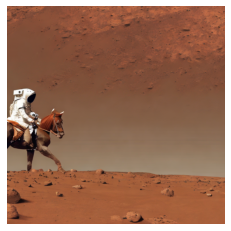

In [10]:
plt.imshow(image)
plt.axis('off')

In [8]:
import os

os.makedirs("output", exist_ok=True)

In [9]:
image.save("output/astronaut_rides_horse.png")